<a href="https://colab.research.google.com/github/Mano1498/Customer_Segmentation_Project/blob/main/Customer_Segmentation(RFM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Necessary Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Dataset Link(UCI ML Repo) : https://archive.ics.uci.edu/dataset/352/online+retail

In [3]:
data = pd.read_excel("/content/drive/MyDrive/DataSets/Online Retail.xlsx")

In [4]:
df = data.copy()

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.shape

(541909, 8)

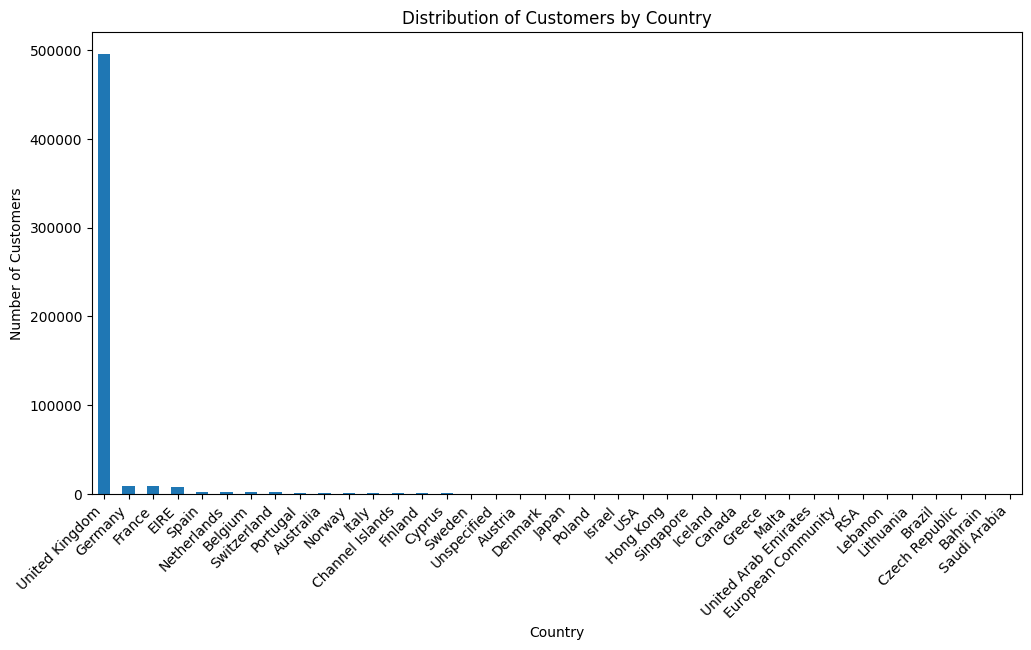

In [8]:
# Distribution of Customer by Country
country_counts = data['Country'].value_counts()
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers by Country')
plt.xticks(rotation=45, ha='right') # ha - horizonatal alingment
plt.show()

In [9]:
country_wise_dis = df[["Country","CustomerID"]].drop_duplicates()
country_wise_dis.groupby(["Country"])["CustomerID"].aggregate("count").reset_index().sort_values("CustomerID",ascending=False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [10]:
df = df[df['Country'] == 'United Kingdom'].reset_index(drop=True) #  keeping only united Kingdom data

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [12]:
df = df.dropna(subset=['CustomerID'])
df = df.reset_index(drop=True)

In [13]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
# Filtering negative values
df = df[(df['Quantity']>0)]
df = df[(df['UnitPrice']>0)]

In [16]:
df["TotalAmount"] = df['Quantity']*df['UnitPrice'] # Creating Total amount column

In [17]:
df.shape

(354321, 9)

In [18]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
#df.to_csv("cleanedOnlineRetail.csv") # Saves as new csv file

In [20]:
data = pd.read_csv("/content/drive/MyDrive/DataSets/cleanedOnlineRetail.csv")

In [21]:
df1 = data.copy()

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354321 entries, 0 to 354320
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   354321 non-null  int64  
 1   InvoiceNo    354321 non-null  int64  
 2   StockCode    354321 non-null  object 
 3   Description  354321 non-null  object 
 4   Quantity     354321 non-null  int64  
 5   InvoiceDate  354321 non-null  object 
 6   UnitPrice    354321 non-null  float64
 7   CustomerID   354321 non-null  float64
 8   Country      354321 non-null  object 
 9   TotalAmount  354321 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 27.0+ MB


## Calculating R,F,M values

In [23]:
df1['CustomerID'] = df1['CustomerID'].astype(int)

In [24]:
rfm_a = df1.groupby("CustomerID")["TotalAmount"].sum()
rfm_a = rfm_a.reset_index()
rfm_a.columns = ["CustomerID","Monetary"]

In [25]:
rfm_a['Monetary'] = rfm_a['Monetary'].round().astype(int)

In [26]:
rfm_a.head()

,CustomerID,Monetary
0,12346,77184
1,12747,4196
2,12748,33720
3,12749,4091
4,12820,942


In [27]:
rfm_f = df1.groupby("CustomerID")["InvoiceNo"].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ["CustomerID","Frequency"]

In [28]:
rfm_f.head()

,CustomerID,Frequency
0,12346,1
1,12747,103
2,12748,4595
3,12749,199
4,12820,59


In [29]:
df1['InvoiceDate'] = pd.to_datetime(df1['InvoiceDate'])
current_date = df1['InvoiceDate'].max()

In [30]:
current_date

Timestamp('2011-12-09 12:49:00')

In [31]:
rfm_r = df1.groupby('CustomerID')['InvoiceDate'].max().reset_index()
rfm_r.columns = ['CustomerID', 'LastPurchaseDate']

In [32]:
rfm_r['Recency'] = (current_date - rfm_r['LastPurchaseDate']).dt.days # extract the number of days from a pandas Timestamp

In [33]:
rfm_r.head()

,CustomerID,LastPurchaseDate,Recency
0,12346,2011-01-18 10:01:00,325
1,12747,2011-12-07 14:34:00,1
2,12748,2011-12-09 12:20:00,0
3,12749,2011-12-06 09:56:00,3
4,12820,2011-12-06 15:12:00,2


In [34]:
rfm_r = rfm_r.drop('LastPurchaseDate', axis=1)

In [35]:
rfm_r.head()

,CustomerID,Recency
0,12346,325
1,12747,1
2,12748,0
3,12749,3
4,12820,2


In [36]:
RFM = pd.merge(rfm_r ,rfm_f , on="CustomerID",how="inner") # Joins rows with matching values
RFM.head()

,CustomerID,Recency,Frequency
0,12346,325,1
1,12747,1,103
2,12748,0,4595
3,12749,3,199
4,12820,2,59


In [37]:
RFM = pd.merge(RFM ,rfm_a , on="CustomerID",how="inner")
RFM.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,77184
1,12747,1,103,4196
2,12748,0,4595,33720
3,12749,3,199,4091
4,12820,2,59,942


In [38]:
RFM.shape

(3920, 4)

## Outliers Detection and Removal

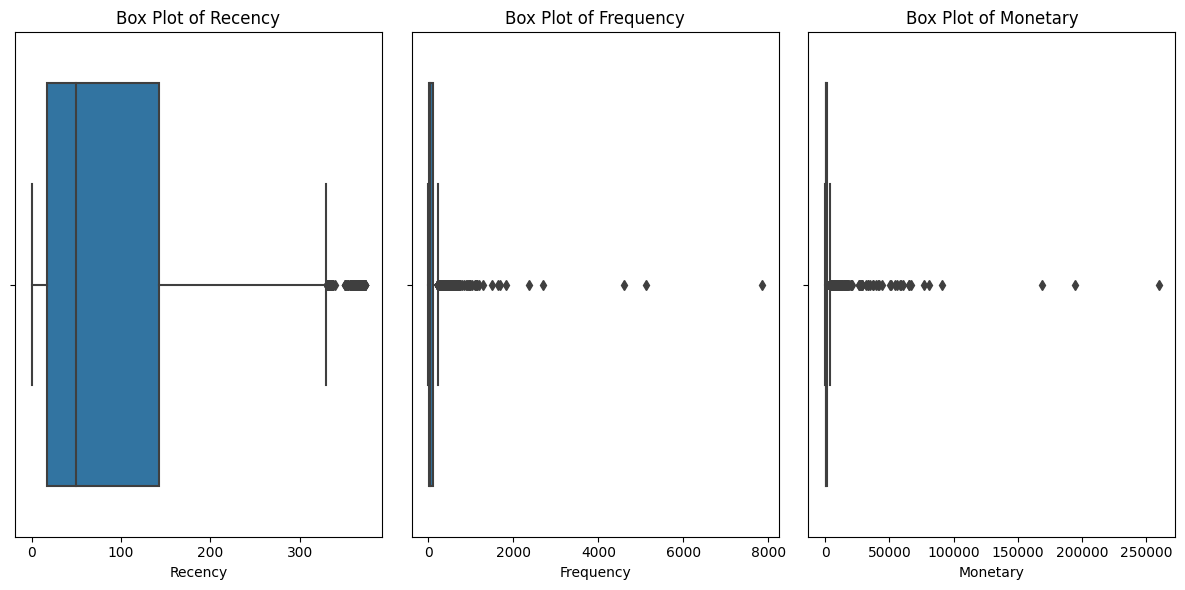

In [39]:
plt.figure(figsize=(12, 6)) # 12 inches in width and 6 inches in height

# Box plot for Recency
plt.subplot(1, 3, 1)                                      # Creating subplots with 1 row and 3 columns
sns.boxplot(x='Recency', data=RFM, orient='v')            # Box plot in Vertical Orientation
plt.title('Box Plot of Recency')

# Box plot for Frequency
plt.subplot(1, 3, 2)
sns.boxplot(x='Frequency', data=RFM, orient='v')
plt.title('Box Plot of Frequency')

# Box plot for Monetary
plt.subplot(1, 3, 3)
sns.boxplot(x='Monetary', data=RFM, orient='v')
plt.title('Box Plot of Monetary')

# Adjust the layout
plt.tight_layout()

# Show the box plots
plt.show()


In [40]:
# Function to remove Outliers Using IQR Method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df
columns_to_remove_outliers = ['Recency', 'Frequency', 'Monetary']
RFM1= remove_outliers(RFM, columns_to_remove_outliers)

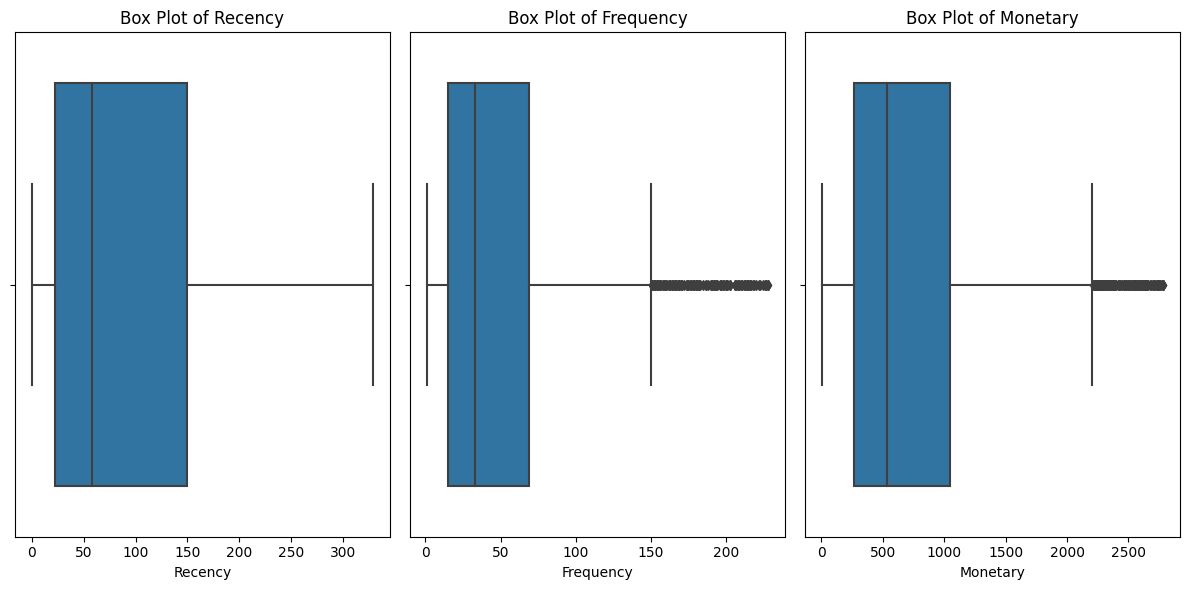

In [41]:

plt.figure(figsize=(12, 6))

# Box plot for Recency
plt.subplot(1, 3, 1)
sns.boxplot(x='Recency', data=RFM1, orient='v')
plt.title('Box Plot of Recency')

# Box plot for Frequency
plt.subplot(1, 3, 2)
sns.boxplot(x='Frequency', data=RFM1, orient='v')
plt.title('Box Plot of Frequency')

# Box plot for Monetary
plt.subplot(1, 3, 3)
sns.boxplot(x='Monetary', data=RFM1, orient='v')
plt.title('Box Plot of Monetary')

# Adjust the layout
plt.tight_layout()

# Show the box plots
plt.show()


In [42]:
RFM1.Recency.describe()

count    3179.000000
mean       92.512425
std        89.960711
min         0.000000
25%        22.000000
50%        58.000000
75%       149.500000
max       329.000000
Name: Recency, dtype: float64

In [43]:
RFM1.Frequency.describe()

count    3179.000000
mean       48.878893
std        45.965012
min         1.000000
25%        15.000000
50%        33.000000
75%        69.000000
max       228.000000
Name: Frequency, dtype: float64

In [44]:
RFM1.Monetary.describe()

count    3179.000000
mean      742.894621
std       634.685987
min         4.000000
25%       267.000000
50%       530.000000
75%      1043.000000
max      2781.000000
Name: Monetary, dtype: float64

## Calculating RFM Scores

In [45]:
#Split into four segments using quantiles
quantiles = RFM1.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [46]:
quantiles

{'CustomerID': {0.25: 14200.0, 0.5: 15571.0, 0.75: 16922.5},
 'Recency': {0.25: 22.0, 0.5: 58.0, 0.75: 149.5},
 'Frequency': {0.25: 15.0, 0.5: 33.0, 0.75: 69.0},
 'Monetary': {0.25: 267.0, 0.5: 530.0, 0.75: 1043.0}}

In [47]:
quantiles.keys()

dict_keys(['CustomerID', 'Recency', 'Frequency', 'Monetary'])

In [48]:
#Functions to create R, F and M segments
def RScoring(x,p,d):                   # d = quantiles dict , p = quantiles keys , x = Recency value
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):                 # d = quantiles dict , p = quantiles keys , x = Frequency and Monetary values
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [49]:
RFM1['R-Score'] = RFM1['Recency'].apply(RScoring, args=('Recency',quantiles))
RFM1['F-Score'] = RFM1['Frequency'].apply(FnMScoring, args=('Frequency',quantiles))
RFM1['M-Score'] = RFM1['Monetary'].apply(FnMScoring, args=('Monetary',quantiles))
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score
4,12820,2,59,942,1,2,2
5,12821,213,6,93,4,4,4
6,12822,70,46,949,3,2,2
7,12823,74,5,1760,3,4,1
8,12824,59,25,397,3,3,3


In [50]:
RFM1['RFMScore'] = RFM1['R-Score'] + RFM1['F-Score'] + RFM1['M-Score']

In [51]:
RFM1.shape

(3179, 8)

In [52]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFMScore
4,12820,2,59,942,1,2,2,5
5,12821,213,6,93,4,4,4,12
6,12822,70,46,949,3,2,2,7
7,12823,74,5,1760,3,4,1,8
8,12824,59,25,397,3,3,3,9


## Assigning Loyalty Levels Based on RFM Scores

In [53]:
# function to assign loyalty levels based on 'RFM1Score'
def LoyaltyLevel(row):
    if row['RFMScore'] >= 10:
        return 'Bronze'
    elif row['RFMScore'] >= 8:
        return 'Silver'
    elif row['RFMScore'] >= 6:
        return 'Gold'
    else:
        return 'Platinum'
# Apply the LoyaltyLevel function to DataFrame
RFM1['LoyaltyLevel'] = RFM1.apply(LoyaltyLevel, axis=1)

In [54]:
RFM1.head(20)

,CustomerID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFMScore,LoyaltyLevel
4,12820,2,59,942,1,2,2,5,Platinum
5,12821,213,6,93,4,4,4,12,Bronze
6,12822,70,46,949,3,2,2,7,Gold
7,12823,74,5,1760,3,4,1,8,Silver
8,12824,59,25,397,3,3,3,9,Silver
9,12826,2,91,1475,1,1,1,3,Platinum
10,12827,5,25,430,1,3,3,7,Gold
11,12828,2,56,1019,1,2,2,5,Platinum
14,12831,261,9,215,4,4,4,12,Bronze
15,12832,31,27,383,2,3,3,8,Silver


In [ ]:
#RFM1.to_csv("RFM2OnlineRetail.csv",index = False)

In [55]:
rfm_df = pd.read_csv("/content/drive/MyDrive/DataSets/RFM2OnlineRetail.csv")

In [56]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R-Score,F-Score,M-Score,RFMScore,LoyaltyLevel
0,12820,2,59,942,1,2,2,5,Platinum
1,12821,213,6,93,4,4,4,12,Bronze
2,12822,70,46,949,3,2,2,7,Gold
3,12823,74,5,1760,3,4,1,8,Silver
4,12824,59,25,397,3,3,3,9,Silver


## Data Visualization

In [57]:
loyalty_colors = {
    'Platinum': '#0065A4',  # Dark Blue
    'Gold': '#FFD700',      # Gold
    'Silver': '#808080',    # Gray
    'Bronze': '#D2691E'     # Chocolate
}

You can get Color code here : https://www.colorhexa.com/


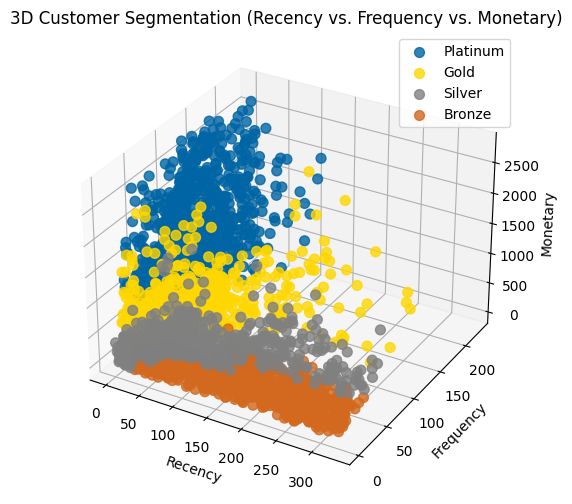

In [58]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')                                                                                   #111 - fig 1row,1column at position 1
for loyalty_level, color in loyalty_colors.items():
    subset = rfm_df[rfm_df['LoyaltyLevel'] == loyalty_level]                                                                 # label - assigns a label to the data points (for legend)
    ax.scatter(subset['Recency'], subset['Frequency'], subset['Monetary'], c=color, label=loyalty_level, s=50, alpha=0.8)    # s - Size of data points , alpha - transparency
ax.set_xlabel('Recency')                                                                                                     # c - set color of data point
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Customer Segmentation (Recency vs. Frequency vs. Monetary)')
ax.legend()
plt.show()

In [ ]:
pip install plotly # For Interactive Plot

about plotly : https://plotly.com/

In [59]:
import plotly.express as px
fig = px.scatter_3d(rfm_df, x='Recency', y='Frequency', z='Monetary', color='LoyaltyLevel', hover_name='CustomerID')
fig.update_layout(
    scene=dict(
        xaxis_title='Recency',
        yaxis_title='Frequency',
        zaxis_title='Monetary',
    ),
    title='3D Customer Segmentation (Recency vs. Frequency vs. Monetary)'
)
fig.show()

## Displaying Image of Interactive Plot for Github

Saving Interactive Plot.png to Interactive Plot.png


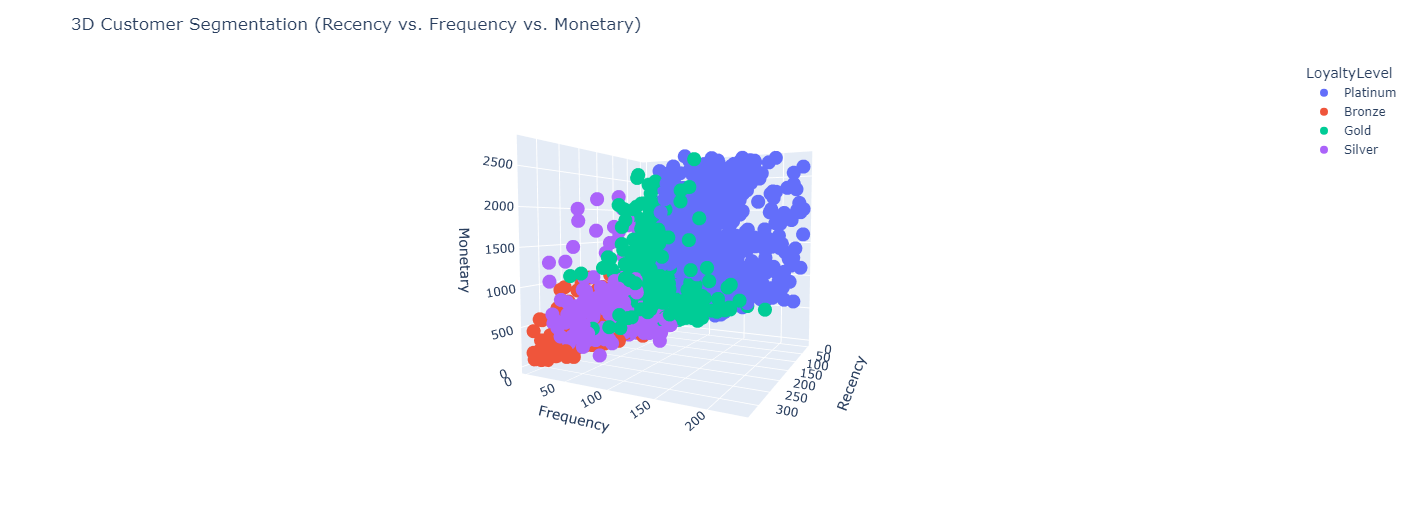

In [60]:
from google.colab import files
from IPython.display import Image
Uploaded = files.upload()
Image("Interactive Plot.png")

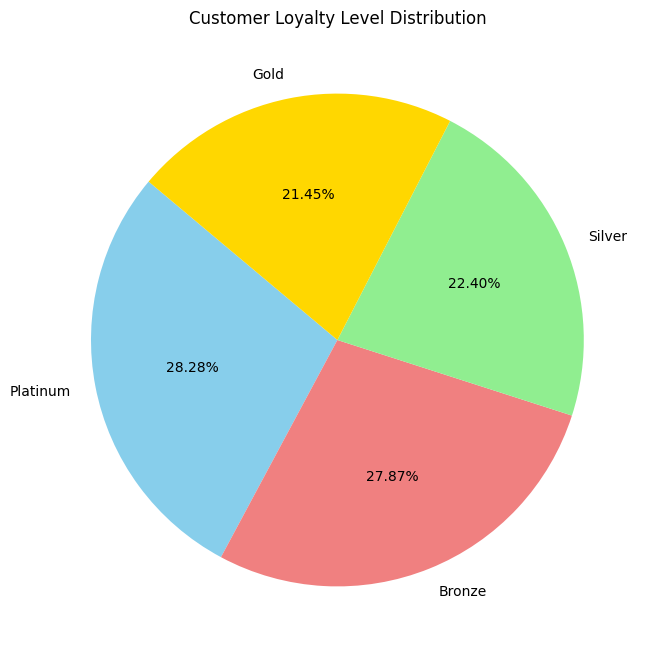

In [61]:
# Count the number of customers in each loyalty level
loyalty_counts = rfm_df['LoyaltyLevel'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(loyalty_counts, labels=loyalty_counts.index, autopct='%1.2f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Customer Loyalty Level Distribution')
plt.show()

## RFM Segmented Customer Information

In [62]:
def get_customer_info(customer_id):
    customer_data = rfm_df[rfm_df['CustomerID'] == customer_id]
    if not customer_data.empty:
        loyalty_level = customer_data['LoyaltyLevel'].values[0]
        recency = customer_data['Recency'].values[0]
        frequency = customer_data['Frequency'].values[0]
        monetary = customer_data['Monetary'].values[0]
        return loyalty_level, recency, frequency, monetary
    else:
        return None


input_customer_id = int(input("Enter Customer ID: "))
result = get_customer_info(input_customer_id)

if result:
    loyalty_level, recency, frequency, monetary = result
    print(f'Customer ID: {input_customer_id}')
    print(f'Loyalty Level: {loyalty_level}')
    print(f'Recency: {recency}')
    print(f'Frequency: {frequency}')
    print(f'Monetary: {monetary}')
else:
    print(f'Customer ID {input_customer_id} not found.')

Enter Customer ID: 18077
Customer ID: 18077
Loyalty Level: Platinum
Recency: 7
Frequency: 227
Monetary: 2633
